In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
from scipy.interpolate import make_interp_spline
import math

In [2]:
m=UNITS.meter
s=UNITS.second
N=UNITS.newton
kg=UNITS.kilogram
deg=UNITS.degree

rho=1.293*kg/m**3

l_1=0.6*m
l_2=0.1*m
l_3=1.045*m
l_4=1.075*m

dt=0.0001*s
M=200*kg
A=0.58*m**2
L=1.115*m
J_x=34.4*kg*m**2
J_y=44.5*kg*m**2
J_z=21.1*kg*m**2
J_xz=-8.3*kg*m**2
J_xy=0*kg*m**2
J_yz=0*kg*m**2
g=9.8*m/s**2
x=17*deg

v_f=1000/3.6*m/s

xt=0.24*m
yt=0.357*m
r=pow(xt**2+yt**2,0.5)

F=25000*N
F_k=20000*N

beta=90*deg-math.atan(yt/xt)/pi*180*deg
L_p=pow(r**2+(l_1+l_2)**2-2*r*(l_1+l_2)*math.cos(beta),0.5)
gamma=math.asin(r/L_p*math.sin(beta))/pi*180*deg

e_f=0.02*m
beta_t=19.5*deg
a=(e_f/math.cos(beta_t)+yt*math.tan(beta_t)+xt)/(1+math.tan(beta_t)**2)

CA=0.07*m**2

t_end_1=1.1*s

newdata = {'Cy':{-90*deg:-0.97717,-80*deg:-1.05665,-70*deg:-1.05718,-60*deg:-1.00930,-50*deg:-0.94624,-40*deg:-0.83137,-30*deg:-0.78178,-20*deg:-0.66764,-10*deg:-0.48342,0*deg:-0.30745,10*deg:-0.16473,17*deg:-0.05976,20*deg:-0.02238,30*deg:0.19076,40*deg:0.37810,50*deg:0.57977,60*deg:0.74033,70*deg:0.84194,80*deg:0.89223,90*deg:0.94059},
           'Cx':{-90*deg:0.28108,-80*deg:0.52915,-70*deg:0.76839,-60*deg:0.94221,-50*deg:1.05139,-40*deg:1.14079,-30*deg:1.12213,-20*deg:1.15325,-10*deg:1.18370,0*deg:1.16329,10*deg:1.08995,17*deg:1.05178,20*deg:1.02085,30*deg:0.85054,40*deg:0.69503,50*deg:0.47548,60*deg:0.29416,70*deg:0.12391,80*deg:-0.01972,90*deg:-0.18496},
           'mz':{-90*deg:0.80590,-80*deg:0.94347,-70*deg:0.98139,-60*deg:0.94513,-50*deg:0.89359,-40*deg:0.80845,-30*deg:0.62912,-20*deg:0.47608,-10*deg:0.35270,0*deg:0.24538,10*deg:0.14742,17*deg:0.08508,20*deg:0.05461,30*deg:-0.05332,40*deg:-0.15739,50*deg:-0.29571,60*deg:-0.38663,70*deg:-0.46222,80*deg:-0.52578,90*deg:-0.62797},
           'Cz':{-90*deg:0.01760,-80*deg:0.00091,-70*deg:-0.02327,-60*deg:-0.05056,-50*deg:-0.07813,-40*deg:-0.05704,-30*deg:-0.00827,-20*deg:-0.00722,-10*deg:-0.01323,0*deg:0.00716,10*deg:0.01746,17*deg:0.01947,20*deg:0.02568,30*deg:0.06986,40*deg:0.02833,50*deg:0.03067,60*deg:0.03789,70*deg:0.02648,80*deg:0.04141,90*deg:0.03404},
           'my':{-90*deg:0.09188,-80*deg:0.09410,-70*deg:0.10179,-60*deg:0.09406,-50*deg:0.08907,-40*deg:0.07593,-30*deg:0.06704,-20*deg:0.05418,-10*deg:0.02852,0*deg:0.01824,10*deg:0.00699,17*deg:-0.01082,20*deg:-0.02198,30*deg:-0.01368,40*deg:-0.01126,50*deg:-0.01653,60*deg:-0.01889,70*deg:-0.02700,80*deg:-0.01896,90*deg:-0.02531},
           'mx':{-90*deg:0.02610,-80*deg:0.01246,-70*deg:0.01522,-60*deg:0.00620,-50*deg:0.00444,-40*deg:0.00539,-30*deg:0.01858,-20*deg:0.00950,-10*deg:-0.00730,0*deg:-0.00563,10*deg:-0.00639,17*deg:-0.01473,20*deg:-0.02039,30*deg:-0.00958,40*deg:-0.01202,50*deg:-0.01280,60*deg:-0.01195,70*deg:-0.01707,80*deg:-0.00428,90*deg:0.01202}
          }
Ratio=DataFrame(newdata)

,Cy,Cx,mz,Cz,my,mx
-90 degree,-0.97717,0.28108,0.80590,0.01760,0.09188,0.02610
-80 degree,-1.05665,0.52915,0.94347,0.00091,0.09410,0.01246
-70 degree,-1.05718,0.76839,0.98139,-0.02327,0.10179,0.01522
-60 degree,-1.00930,0.94221,0.94513,-0.05056,0.09406,0.00620
-50 degree,-0.94624,1.05139,0.89359,-0.07813,0.08907,0.00444
-40 degree,-0.83137,1.14079,0.80845,-0.05704,0.07593,0.00539
-30 degree,-0.78178,1.12213,0.62912,-0.00827,0.06704,0.01858
-20 degree,-0.66764,1.15325,0.47608,-0.00722,0.05418,0.00950
-10 degree,-0.48342,1.18370,0.35270,-0.01323,0.02852,-0.00730
0 degree,-0.30745,1.16329,0.24538,0.00716,0.01824,-0.00563


In [3]:
def run_rk4(system,slope_func):
    
    #the default message if nothing changes
    msg="The solver successfully reached the end of the integration interval."
    
    #get parameters from system
    init=system.init
    t_0=system.t_0
    t_end=system.t_end
    system.t_end=t_0+dt*3
    
    #make the TimeFrame
    frame,details=run_euler(system,slope_func)
    ts=linrange(t_0,t_end,dt)*get_units(t_end)
    system.t_end=t_end

    #run the solver
    for t1 in ts:
        y1=frame.row[round(t1,4)]
        slopes=slope_func(y1,round(t1,4),system)
        y_0=[y+1/6*slope*dt for y,slope in zip(y1,slopes)]
        
        y2=[y+1/6*slope*dt/2 for y,slope in zip(y1,slopes)]
        slopes=slope_func(y2,round(t1+dt/2,4),system)
        y_0=[y+2/6*slope*dt for y,slope in zip(y_0,slopes)]
        
        y3=[y+2/6*slope*dt/2 for y,slope in zip(y1,slopes)]
        slopes=slope_func(y3,round(t1+dt/2,4),system)
        y_0=[y+2/6*slope*dt for y,slope in zip(y_0,slopes)]
        
        y4=[y+2/6*slope*dt for y,slope in zip(y1,slopes)]
        slopes=slope_func(y4,round(t1+dt,4),system)
        y_0=[y+1/6*slope*dt for y,slope in zip(y_0,slopes)]
        
        t2=round(t1+dt,4)
        frame.row[t2]=y_0

    return frame

In [4]:
def slope_func_cc(state,t,system):
    l,x_ji,y_ji,x_di,y_di,phi,theta,v,v_x,v_y,w_phi,w_theta=state
    G=M*g
    
    v0=pow(v**2+v_f**2-2*v*v_f*math.cos(90*deg-theta),0.5)
    theta_gui=math.asin(v/v0*math.sin(90*deg-theta))/pi*180*deg
    alpha=theta-theta_gui
    
    xxx=Ratio.loc[[round(alpha/10)*10]]
    Cy=float(xxx.Cy)
    Cx=float(xxx.Cx)
    mz=float(xxx.mz)
    Cz=float(xxx.Cz)
    my=float(xxx.my)
    mx=float(xxx.mx)
    
    P=0.5*rho*v0**2*Cy*A
    Q=0.5*rho*v0**2*Cx*A
    M_z=0.5*rho*v0**2*mz*A*L
    
    dl=v
    dx_ji=v*math.sin(theta)
    dy_ji=v*math.cos(theta)
    
    dx_di=v*math.sin(theta)-v_f
    dy_di=v*math.cos(theta)
    
    dphi=w_phi
    dtheta=w_theta
    
    if l<l_1:
        dv=(F_k-G*math.cos(x))/M
        dw_phi=0*deg/s**2
        dw_theta=0*deg/s**2
    elif l<(l_1+l_2):
        dv=(F_k-G*math.cos(x)+P*math.cos(alpha)+Q*math.sin(alpha))/M
        
        M_a=M_z+P*(xt*math.cos(alpha)-yt*math.sin(alpha))+Q*(xt*math.sin(alpha)+yt*math.cos(alpha))
        M_G=G*r*math.cos(theta+math.atan(yt/xt)/pi*180*deg)
        J_c=J_z+M*r**2
        
        dw_phi=(M_a-M_G)/J_c/pi*180*deg
        dw_theta=dw_phi
    else:
        dv=(F_k+(P*math.cos(theta_gui)-Q*math.sin(theta_gui)-G)*math.cos(phi)+(P*math.sin(theta_gui)+Q*math.cos(theta_gui))*math.sin(phi))/M
        
        x0=((P*math.sin(theta_gui)+Q*math.cos(theta_gui))*math.cos(phi)-(P*math.cos(theta_gui)-Q*math.sin(theta_gui)-G)*math.sin(phi))/(M*l)-2*v*w_phi/l-a*w_theta**2*math.sin(theta+gamma-phi)/l
        J_A=J_z+M*L_p**2
        y0=(L_p*((P*math.cos(theta_gui)-Q*math.sin(theta_gui)-G)*math.sin(theta+gamma)-(P*math.sin(theta_gui)+Q*math.cos(theta_gui))*math.cos(theta+gamma))+M_z-M*a*((dv-l*w_phi**2)*math.sin(theta+gamma-phi)-2*v*w_phi*math.cos(theta+gamma-phi)))/J_A
        
        dw_phi=(x0+a*math.cos(theta+gamma-phi)*y0/l)/(1-M*a**2*math.cos(theta+gamma-phi)**2/J_A)/pi*180*deg
        dw_theta=M*a*l*math.cos(theta+gamma-phi)*dw_phi/J_A+y0/pi*180*deg
    
    dv_x=-dv*math.sin(theta)-v*math.cos(theta)*dtheta
    dv_y=dv*math.cos(theta)-v*math.sin(theta)*dtheta
    
    return dl,dx_ji,dy_ji,dx_di,dy_di,dphi,dtheta,dv,dv_x,dv_y,dw_phi,dw_theta

In [5]:
def time_sd(init_cc):
    ts=linrange(0*s,0.2*s,dt)
    system_cc=System(init=init_cc,t_0=0*s,t_end=0.2*s,dt=dt)
    results=run_rk4(system_cc,slope_func_cc)
    for t in ts:
        if results.row[round(t,4)].l>1.045*m:
            t_end=round(t,4)*s
            break
            
    return t_end

In [6]:
def slope_func_lj(state,t,system):
    l,x_ji,y_ji,x_di,y_di,theta,theta_gui,v,v_x,v_y,w_theta=state
    G=M*g
    
    alpha=theta-theta_gui
    
    xxx=Ratio.loc[[round(alpha/10)*10]]
    Cy=float(xxx.Cy)
    Cx=float(xxx.Cx)
    mz=float(xxx.mz)
    Cz=float(xxx.Cz)
    my=float(xxx.my)
    mx=float(xxx.mx)
    
    P=0.5*rho*v**2*Cy*A
    Q=0.5*rho*v**2*Cx*A
    M_z1=0.5*rho*v**2*mz*A*L
    M_z=M_z1-P*(xt*math.cos(alpha)-yt*math.sin(alpha))-Q*(xt*math.sin(alpha)+yt*math.cos(alpha))
    
    v_k=pow(pow(v_f-v*math.cos(theta_gui),2)+pow(v*math.sin(theta_gui),2),0.5)
    dl=v_k
    dx_ji=v_k*math.sin(theta)
    dy_ji=v_k*math.cos(theta)
    
    dx_di=v_k*math.sin(theta)-v_f
    dy_di=v_k*math.cos(theta)
    
    dtheta=w_theta
    
    if l<l_4:
        dv=(-Q-G*math.sin(theta_gui)-0.5*rho*CA*pow(v-L_p*w_theta*math.cos(alpha+gamma),2))/M
        dtheta_gui=(P-G*math.cos(theta_gui)+0.5*rho*CA*abs(w_theta*pow(L_p*math.sin(alpha+gamma),2))*w_theta)/M/v
        dw_theta=(M_z+0.5*rho*CA*pow(v-L_p*w_theta*math.cos(alpha+gamma),2)*L_p*math.cos(alpha+gamma)-0.5*rho*CA*abs(w_theta*pow(L_p*math.sin(alpha+gamma),3))*w_theta)/J_z
    elif t<0.5545*s:
        dv=(-Q-G*math.sin(theta_gui)-F*math.sin(alpha+beta_t)-0.5*rho*CA*pow(v-L_p*w_theta*math.cos(alpha+gamma),2))/M
        dtheta_gui=(P-G*math.cos(theta_gui)+F*math.cos(alpha+beta_t)+0.5*rho*CA*abs(w_theta*pow(L_p*math.sin(alpha+gamma),2))*w_theta)/M/v
        dw_theta=(M_z+F*e_f+0.5*rho*CA*pow(v-L_p*w_theta*math.cos(alpha+gamma),2)*L_p*math.cos(alpha+gamma)-0.5*rho*CA*abs(w_theta*pow(L_p*math.sin(alpha+gamma),3))*w_theta)/J_z
    else:
        dv=(-Q-G*math.sin(theta_gui)-0.5*rho*CA*pow(v-L_p*w_theta*math.cos(alpha+gamma),2))/M
        dtheta_gui=(P-G*math.cos(theta_gui)+0.5*rho*CA*abs(w_theta*pow(L_p*math.sin(alpha+gamma),2))*w_theta)/M/v
        dw_theta=(M_z+0.5*rho*CA*pow(v-L_p*w_theta*math.cos(alpha+gamma),2)*L_p*math.cos(alpha+gamma)-0.5*rho*CA*abs(w_theta*pow(L_p*math.sin(alpha+gamma),3))*w_theta)/J_z
    
    dv_x=dv*math.cos(theta_gui)-v*math.sin(theta_gui)*dtheta_gui
    dv_y=dv*math.sin(theta_gui)+v*math.cos(theta_gui)*dtheta_gui
    
    return dl,dx_ji,dy_ji,dx_di,dy_di,dtheta,dtheta_gui,dv,dv_x,dv_y,dw_theta

In [7]:
def make_sys(results_cc,t_end0):
    l_0=get_last_value(results_cc.l)
    x_ji0=get_last_value(results_cc.x_ji)
    y_ji0=get_last_value(results_cc.y_ji)
    x_di0=get_last_value(results_cc.x_di)
    y_di0=get_last_value(results_cc.y_di)
    theta_0=get_last_value(results_cc.theta)
    v_0=get_last_value(results_cc.v)
    w_theta0=get_last_value(results_cc.w_theta)
    phi0=get_last_value(results_cc.phi)

    v0=pow(v_0**2+v_f**2-2*v_0*v_f*math.cos(90*deg-theta_0),0.5)
    theta_gui0=math.asin(v_0/v0*math.sin(90*deg-theta_0))/pi*180*deg
    init_lj=State(l=l_0,x_ji=x_ji0,y_ji=y_ji0,x_di=x_di0,y_di=y_di0,theta=theta_0,theta_gui=theta_gui0,v=v0,v_x=v0*math.cos(theta_gui0),v_y=v0*math.sin(theta_gui0),w_theta=w_theta0)
    system_lj=System(init=init_lj,t_0=t_end0,t_end=t_end_1,dt=dt)
    return system_lj

飞机飞行速度变化

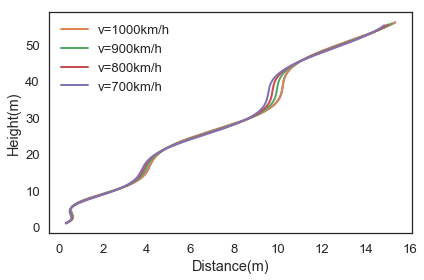

In [38]:
init_cc=State(l=0*m,x_ji=0*m,y_ji=0*m,x_di=0*m,y_di=0*m,phi=x,theta=x,v=0*m/s,v_x=v_f,v_y=0*m/s,w_phi=0*deg/s,w_theta=0*deg/s)
t_end0=time_sd(init_cc)
system_cc=System(init=init_cc,t_0=0*s,t_end=t_end0,dt=dt)
results_cc=run_rk4(system_cc,slope_func_cc)

v_f=900/3.6*m/s
init_cc=State(l=0*m,x_ji=0*m,y_ji=0*m,x_di=0*m,y_di=0*m,phi=x,theta=x,v=0*m/s,v_x=v_f,v_y=0*m/s,w_phi=0*deg/s,w_theta=0*deg/s)
t_end1=time_sd(init_cc)
system_cc1=System(init=init_cc,t_0=0*s,t_end=t_end1,dt=dt)
results_cc1=run_rk4(system_cc1,slope_func_cc)

v_f=800/3.6*m/s
init_cc=State(l=0*m,x_ji=0*m,y_ji=0*m,x_di=0*m,y_di=0*m,phi=x,theta=x,v=0*m/s,v_x=v_f,v_y=0*m/s,w_phi=0*deg/s,w_theta=0*deg/s)
t_end2=time_sd(init_cc)
system_cc2=System(init=init_cc,t_0=0*s,t_end=t_end2,dt=dt)
results_cc2=run_rk4(system_cc2,slope_func_cc)

v_f=700/3.6*m/s
init_cc=State(l=0*m,x_ji=0*m,y_ji=0*m,x_di=0*m,y_di=0*m,phi=x,theta=x,v=0*m/s,v_x=v_f,v_y=0*m/s,w_phi=0*deg/s,w_theta=0*deg/s)
t_end3=time_sd(init_cc)
system_cc3=System(init=init_cc,t_0=0*s,t_end=t_end3,dt=dt)
results_cc3=run_rk4(system_cc3,slope_func_cc)

system_lj=make_sys(results_cc,t_end0)
results_lj=run_rk4(system_lj,slope_func_lj)

system_lj1=make_sys(results_cc1,t_end1)
results_lj1=run_rk4(system_lj1,slope_func_lj)

system_lj2=make_sys(results_cc2,t_end2)
results_lj2=run_rk4(system_lj2,slope_func_lj)

system_lj3=make_sys(results_cc3,t_end3)
results_lj3=run_rk4(system_lj3,slope_func_lj)

plot(results_lj.x_ji,results_lj.y_ji)
decorate(xlabel='Distance(m)',ylabel='Height(m)')

plot(results_lj.x_ji,results_lj.y_ji,label='v=1000km/h',color='C1')
plot(results_lj1.x_ji,results_lj1.y_ji,label='v=900km/h',color='C2')
plot(results_lj2.x_ji,results_lj2.y_ji,label='v=800km/h',color='C3')
plot(results_lj3.x_ji,results_lj3.y_ji,label='v=700km/h',color='C4')
decorate(xlabel='Distance(m)',ylabel='Height(m)')

In [8]:
def accel2(system,t0,tk):
    ts=linrange(t0,tk,dt)
    frame=TimeFrame(columns=[['n']])
    G=M*g
    
    for t in ts:
        l,x_ji,y_ji,x_di,y_di,theta,theta_gui,v,v_x,v_y,w_theta=system.row[round(t,4)]
        
        alpha=theta-theta_gui
    
        xxx=Ratio.loc[[round(alpha/10)*10]]
        Cy=float(xxx.Cy)
        Cx=float(xxx.Cx)
        mz=float(xxx.mz)
        Cz=float(xxx.Cz)
        my=float(xxx.my)
        mx=float(xxx.mx)
        
        P=0.5*rho*v**2*Cy*A
        Q=0.5*rho*v**2*Cx*A
        
        if l<l_4:
            dv=(-Q-G*math.sin(theta_gui)-0.5*rho*CA*pow(v-L_p*w_theta*math.cos(alpha+gamma),2))/M
        elif t<0.5545:
            dv=(-Q-G*math.sin(theta_gui)-F*math.sin(alpha+beta_t)-0.5*rho*CA*pow(v-L_p*w_theta*math.cos(alpha+gamma),2))/M
        else:
            dv=(-Q-G*math.sin(theta_gui)-0.5*rho*CA*pow(v-L_p*w_theta*math.cos(alpha+gamma),2))/M
        
        n=dv/g
        frame1=TimeFrame([[n]],columns=[['n']],index=[t])
        frame=frame.append(frame1)
        
    return frame

In [9]:
def guozai(t_end,results_lj):
    T=linrange(t_end,t_end_1,dt)
    accel_lj=accel2(results_lj,t_end,t_end_1)
    
    xnew = np.linspace(T.min(),T.max(),300)
    y_smooth = make_interp_spline(T,accel_lj.n)
    
    x_smooth = np.linspace(T.min(), T.max(), 300)
    y_smooth = make_interp_spline(T, accel_lj.n)(x_smooth)

    return x_smooth, y_smooth

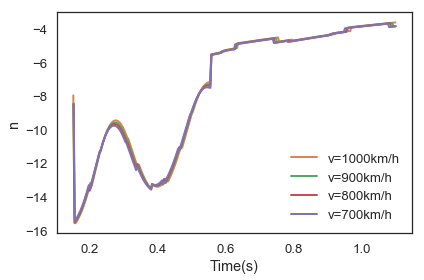

In [41]:
x_smooth, y_smooth=guozai(t_end0,results_lj)
x1_smooth, y1_smooth=guozai(t_end1,results_lj1)
x2_smooth, y2_smooth=guozai(t_end2,results_lj2)
x3_smooth, y3_smooth=guozai(t_end3,results_lj3)

plot(x_smooth, y_smooth,label='v=1000km/h',color='C1')
plot(x1_smooth, y1_smooth,label='v=900km/h',color='C2')
plot(x2_smooth, y2_smooth,label='v=800km/h',color='C3')
plot(x3_smooth, y3_smooth,label='v=700km/h',color='C4')

decorate(xlabel='Time(s)',ylabel='n')

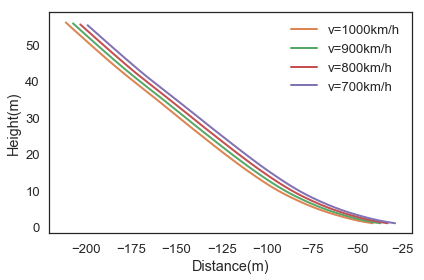

In [42]:
plot(results_lj.x_di,results_lj.y_di,label='v=1000km/h',color='C1')
plot(results_lj1.x_di,results_lj1.y_di,label='v=900km/h',color='C2')
plot(results_lj2.x_di,results_lj2.y_di,label='v=800km/h',color='C3')
plot(results_lj3.x_di,results_lj3.y_di,label='v=700km/h',color='C4')

decorate(xlabel='Distance(m)',ylabel='Height(m)')

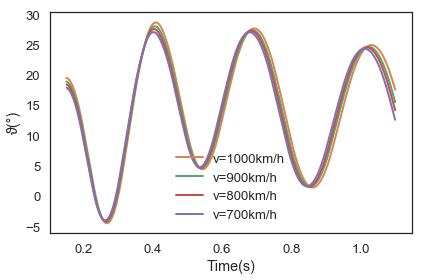

In [43]:
plot(results_lj.theta,label='v=1000km/h',color='C1')
plot(results_lj1.theta,label='v=900km/h',color='C2')
plot(results_lj2.theta,label='v=800km/h',color='C3')
plot(results_lj3.theta,label='v=700km/h',color='C4')

decorate(xlabel='Time(s)',ylabel='ϑ(°)')

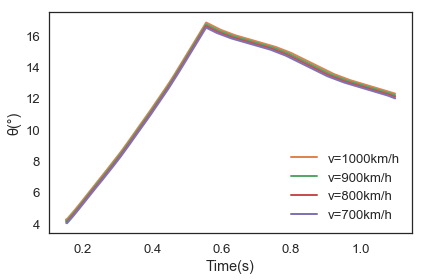

In [44]:
plot(results_lj.theta_gui,label='v=1000km/h',color='C1')
plot(results_lj1.theta_gui,label='v=900km/h',color='C2')
plot(results_lj2.theta_gui,label='v=800km/h',color='C3')
plot(results_lj3.theta_gui,label='v=700km/h',color='C4')

decorate(xlabel='Time(s)',ylabel='θ(°)')

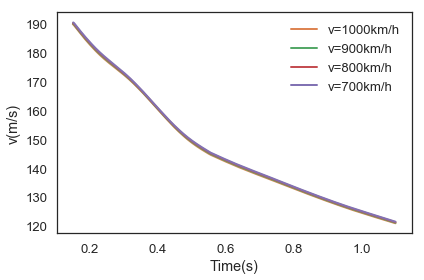

In [45]:
plot(results_lj.v,label='v=1000km/h',color='C1')
plot(results_lj1.v,label='v=900km/h',color='C2')
plot(results_lj2.v,label='v=800km/h',color='C3')
plot(results_lj3.v,label='v=700km/h',color='C4')

decorate(xlabel='Time(s)',ylabel='v(m/s)')

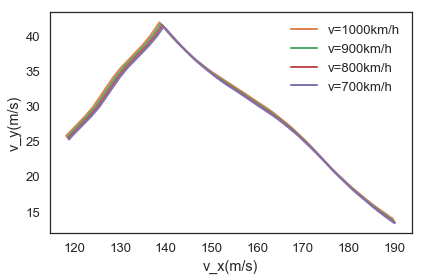

In [46]:
plot(results_lj.v_x,results_lj.v_y,label='v=1000km/h',color='C1')
plot(results_lj1.v_x,results_lj1.v_y,label='v=900km/h',color='C2')
plot(results_lj2.v_x,results_lj2.v_y,label='v=800km/h',color='C3')
plot(results_lj3.v_x,results_lj3.v_y,label='v=700km/h',color='C4')

decorate(xlabel='v_x(m/s)',ylabel='v_y(m/s)')

人椅系统质量变化

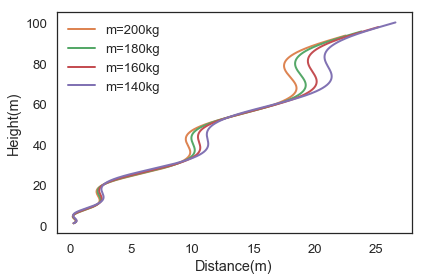

In [47]:
v_f=1000/3.6*m/s
init_cc=State(l=0*m,x_ji=0*m,y_ji=0*m,x_di=0*m,y_di=0*m,phi=x,theta=x,v=0*m/s,v_x=v_f,v_y=0*m/s,w_phi=0*deg/s,w_theta=0*deg/s)

M=200*kg
t_end0=time_sd(init_cc)
system_cc=System(init=init_cc,t_0=0*s,t_end=t_end0,dt=dt)
results_cc=run_rk4(system_cc,slope_func_cc)

M=180*kg
t_end1=time_sd(init_cc)
system_cc1=System(init=init_cc,t_0=0*s,t_end=t_end1,dt=dt)
results_cc1=run_rk4(system_cc1,slope_func_cc)

M=160*kg
t_end2=time_sd(init_cc)
system_cc2=System(init=init_cc,t_0=0*s,t_end=t_end2,dt=dt)
results_cc2=run_rk4(system_cc2,slope_func_cc)

M=140*kg
t_end3=time_sd(init_cc)
system_cc3=System(init=init_cc,t_0=0*s,t_end=t_end3,dt=dt)
results_cc3=run_rk4(system_cc3,slope_func_cc)

system_lj=make_sys(results_cc,t_end0)
results_lj=run_rk4(system_lj,slope_func_lj)

system_lj1=make_sys(results_cc1,t_end1)
results_lj1=run_rk4(system_lj1,slope_func_lj)

system_lj2=make_sys(results_cc2,t_end2)
results_lj2=run_rk4(system_lj2,slope_func_lj)

system_lj3=make_sys(results_cc3,t_end3)
results_lj3=run_rk4(system_lj3,slope_func_lj)

plot(results_lj.x_ji,results_lj.y_ji,label='m=200kg',color='C1')
plot(results_lj1.x_ji,results_lj1.y_ji,label='m=180kg',color='C2')
plot(results_lj2.x_ji,results_lj2.y_ji,label='m=160kg',color='C3')
plot(results_lj3.x_ji,results_lj3.y_ji,label='m=140kg',color='C4')
decorate(xlabel='Distance(m)',ylabel='Height(m)')

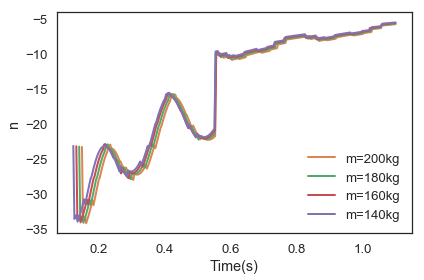

In [48]:
x_smooth, y_smooth=guozai(t_end0,results_lj)
x1_smooth, y1_smooth=guozai(t_end1,results_lj1)
x2_smooth, y2_smooth=guozai(t_end2,results_lj2)
x3_smooth, y3_smooth=guozai(t_end3,results_lj3)

plot(x_smooth, y_smooth,label='m=200kg',color='C1')
plot(x1_smooth, y1_smooth,label='m=180kg',color='C2')
plot(x2_smooth, y2_smooth,label='m=160kg',color='C3')
plot(x3_smooth, y3_smooth,label='m=140kg',color='C4')

decorate(xlabel='Time(s)',ylabel='n')

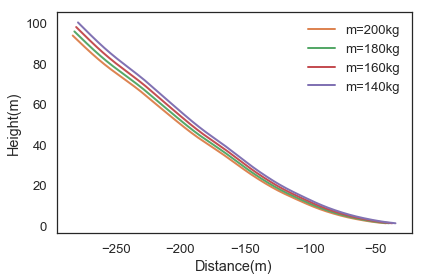

In [49]:
plot(results_lj.x_di,results_lj.y_di,label='m=200kg',color='C1')
plot(results_lj1.x_di,results_lj1.y_di,label='m=180kg',color='C2')
plot(results_lj2.x_di,results_lj2.y_di,label='m=160kg',color='C3')
plot(results_lj3.x_di,results_lj3.y_di,label='m=140kg',color='C4')

decorate(xlabel='Distance(m)',ylabel='Height(m)')

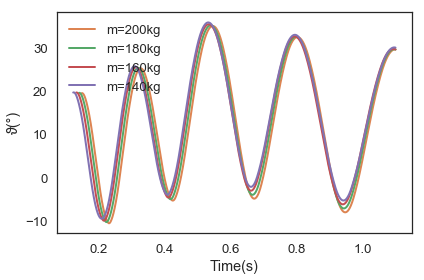

In [50]:
plot(results_lj.theta,label='m=200kg',color='C1')
plot(results_lj1.theta,label='m=180kg',color='C2')
plot(results_lj2.theta,label='m=160kg',color='C3')
plot(results_lj3.theta,label='m=140kg',color='C4')

decorate(xlabel='Time(s)',ylabel='ϑ(°)')

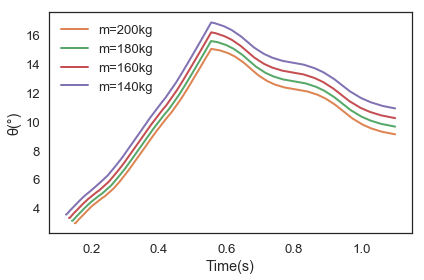

In [51]:
plot(results_lj.theta_gui,label='m=200kg',color='C1')
plot(results_lj1.theta_gui,label='m=180kg',color='C2')
plot(results_lj2.theta_gui,label='m=160kg',color='C3')
plot(results_lj3.theta_gui,label='m=140kg',color='C4')

decorate(xlabel='Time(s)',ylabel='θ(°)')

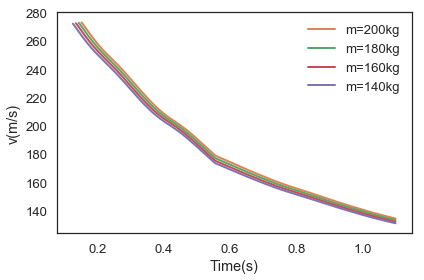

In [52]:
plot(results_lj.v,label='m=200kg',color='C1')
plot(results_lj1.v,label='m=180kg',color='C2')
plot(results_lj2.v,label='m=160kg',color='C3')
plot(results_lj3.v,label='m=140kg',color='C4')

decorate(xlabel='Time(s)',ylabel='v(m/s)')

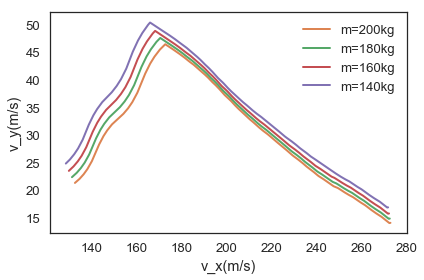

In [53]:
plot(results_lj.v_x,results_lj.v_y,label='m=200kg',color='C1')
plot(results_lj1.v_x,results_lj1.v_y,label='m=180kg',color='C2')
plot(results_lj2.v_x,results_lj2.v_y,label='m=160kg',color='C3')
plot(results_lj3.v_x,results_lj3.v_y,label='m=140kg',color='C4')

decorate(xlabel='v_x(m/s)',ylabel='v_y(m/s)')

导轨倾角变化

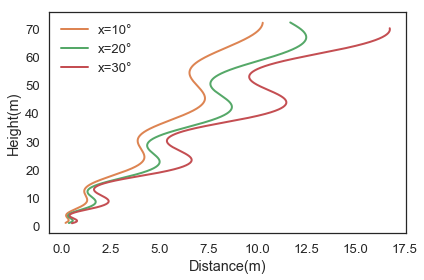

In [54]:
M=210*kg
v_f=1000/3.6*m/s

x=10*deg
init_cc=State(l=0*m,x_ji=0*m,y_ji=0*m,x_di=0*m,y_di=0*m,phi=x,theta=x,v=0*m/s,v_x=1000/3.6*m/s,v_y=0*m/s,w_phi=0*deg/s,w_theta=0*deg/s)
t_end0=time_sd(init_cc)
system_cc=System(init=init_cc,t_0=0*s,t_end=t_end0,dt=dt)
results_cc=run_rk4(system_cc,slope_func_cc)

x=20*deg
init_cc=State(l=0*m,x_ji=0*m,y_ji=0*m,x_di=0*m,y_di=0*m,phi=x,theta=x,v=0*m/s,v_x=1000/3.6*m/s,v_y=0*m/s,w_phi=0*deg/s,w_theta=0*deg/s)
t_end1=time_sd(init_cc)
system_cc1=System(init=init_cc,t_0=0*s,t_end=t_end1,dt=dt)
results_cc1=run_rk4(system_cc1,slope_func_cc)

x=30*deg
init_cc=State(l=0*m,x_ji=0*m,y_ji=0*m,x_di=0*m,y_di=0*m,phi=x,theta=x,v=0*m/s,v_x=1000/3.6*m/s,v_y=0*m/s,w_phi=0*deg/s,w_theta=0*deg/s)
t_end2=time_sd(init_cc)
system_cc2=System(init=init_cc,t_0=0*s,t_end=t_end2,dt=dt)
results_cc2=run_rk4(system_cc2,slope_func_cc)

system_lj=make_sys(results_cc,t_end0)
results_lj=run_rk4(system_lj,slope_func_lj)

system_lj1=make_sys(results_cc1,t_end1)
results_lj1=run_rk4(system_lj1,slope_func_lj)

system_lj2=make_sys(results_cc2,t_end2)
results_lj2=run_rk4(system_lj2,slope_func_lj)

plot(results_lj.x_ji,results_lj.y_ji,label='x=10°',color='C1')
plot(results_lj1.x_ji,results_lj1.y_ji,label='x=20°',color='C2')
plot(results_lj2.x_ji,results_lj2.y_ji,label='x=30°',color='C3')
decorate(xlabel='Distance(m)',ylabel='Height(m)')

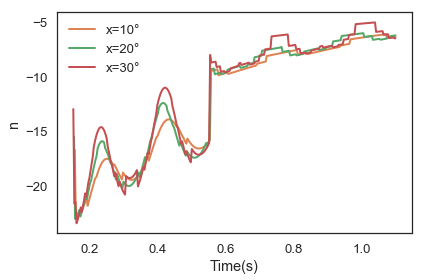

In [55]:
x_smooth, y_smooth=guozai(t_end0,results_lj)
x1_smooth, y1_smooth=guozai(t_end1,results_lj1)
x2_smooth, y2_smooth=guozai(t_end2,results_lj2)

plot(x_smooth, y_smooth,label='x=10°',color='C1')
plot(x1_smooth, y1_smooth,label='x=20°',color='C2')
plot(x2_smooth, y2_smooth,label='x=30°',color='C3')

decorate(xlabel='Time(s)',ylabel='n')

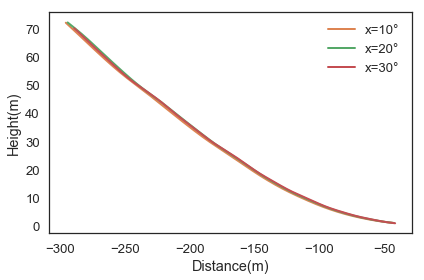

In [56]:
plot(results_lj.x_di,results_lj.y_di,label='x=10°',color='C1')
plot(results_lj1.x_di,results_lj1.y_di,label='x=20°',color='C2')
plot(results_lj2.x_di,results_lj2.y_di,label='x=30°',color='C3')

decorate(xlabel='Distance(m)',ylabel='Height(m)')

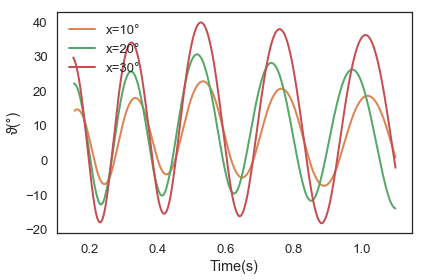

In [57]:
plot(results_lj.theta,label='x=10°',color='C1')
plot(results_lj1.theta,label='x=20°',color='C2')
plot(results_lj2.theta,label='x=30°',color='C3')

decorate(xlabel='Time(s)',ylabel='ϑ(°)')

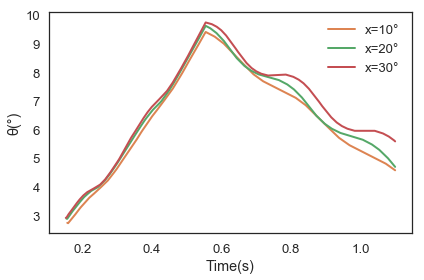

In [58]:
plot(results_lj.theta_gui,label='x=10°',color='C1')
plot(results_lj1.theta_gui,label='x=20°',color='C2')
plot(results_lj2.theta_gui,label='x=30°',color='C3')

decorate(xlabel='Time(s)',ylabel='θ(°)')

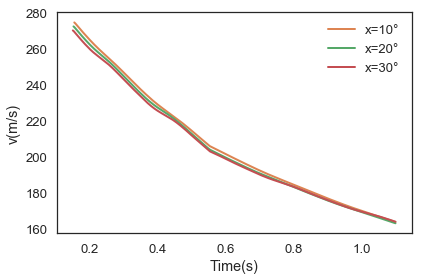

In [59]:
plot(results_lj.v,label='x=10°',color='C1')
plot(results_lj1.v,label='x=20°',color='C2')
plot(results_lj2.v,label='x=30°',color='C3')

decorate(xlabel='Time(s)',ylabel='v(m/s)')

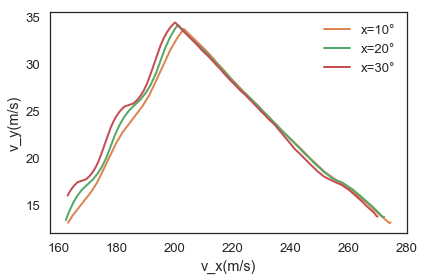

In [60]:
plot(results_lj.v_x,results_lj.v_y,label='x=10°',color='C1')
plot(results_lj1.v_x,results_lj1.v_y,label='x=20°',color='C2')
plot(results_lj2.v_x,results_lj2.v_y,label='x=30°',color='C3')

decorate(xlabel='v_x(m/s)',ylabel='v_y(m/s)')

火箭包推力变化

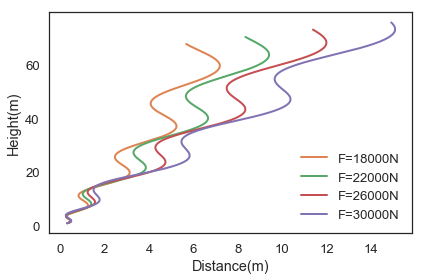

In [19]:
M=210*kg
v_f=1000/3.6*m/s
x=17*deg
F_k=20000*N

init_cc=State(l=0*m,x_ji=0*m,y_ji=0*m,x_di=0*m,y_di=0*m,phi=x,theta=x,v=0*m/s,v_x=v_f,v_y=0*m/s,w_phi=0*deg/s,w_theta=0*deg/s)
t_end0=time_sd(init_cc)
system_cc=System(init=init_cc,t_0=0*s,t_end=t_end0,dt=dt)
results_cc=run_rk4(system_cc,slope_func_cc)
system_lj=make_sys(results_cc,t_end0)

F=18000*N
results_lj=run_rk4(system_lj,slope_func_lj)

F=22000*N
results_lj1=run_rk4(system_lj,slope_func_lj)

F=26000*N
results_lj2=run_rk4(system_lj,slope_func_lj)

F=30000*N
results_lj3=run_rk4(system_lj,slope_func_lj)

plot(results_lj.x_ji,results_lj.y_ji,label='F=18000N',color='C1')
plot(results_lj1.x_ji,results_lj1.y_ji,label='F=22000N',color='C2')
plot(results_lj2.x_ji,results_lj2.y_ji,label='F=26000N',color='C3')
plot(results_lj3.x_ji,results_lj3.y_ji,label='F=30000N',color='C4')
decorate(xlabel='Distance(m)',ylabel='Height(m)')

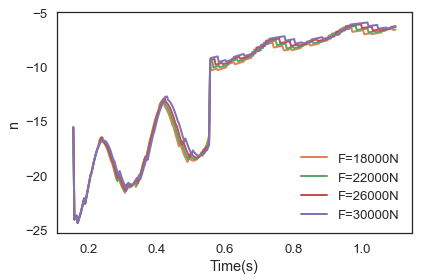

In [20]:
x_smooth, y_smooth=guozai(t_end0,results_lj)
x1_smooth, y1_smooth=guozai(t_end1,results_lj1)
x2_smooth, y2_smooth=guozai(t_end2,results_lj2)
x3_smooth, y3_smooth=guozai(t_end3,results_lj3)

plot(x_smooth, y_smooth,label='F=18000N',color='C1')
plot(x1_smooth, y1_smooth,label='F=22000N',color='C2')
plot(x2_smooth, y2_smooth,label='F=26000N',color='C3')
plot(x3_smooth, y3_smooth,label='F=30000N',color='C4')

decorate(xlabel='Time(s)',ylabel='n')

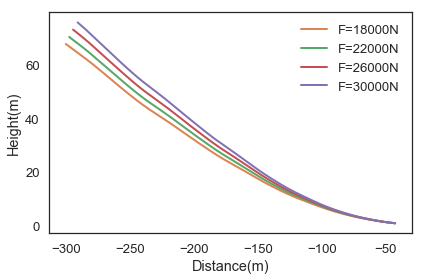

In [21]:
plot(results_lj.x_di,results_lj.y_di,label='F=18000N',color='C1')
plot(results_lj1.x_di,results_lj1.y_di,label='F=22000N',color='C2')
plot(results_lj2.x_di,results_lj2.y_di,label='F=26000N',color='C3')
plot(results_lj3.x_di,results_lj3.y_di,label='F=30000N',color='C4')

decorate(xlabel='Distance(m)',ylabel='Height(m)')

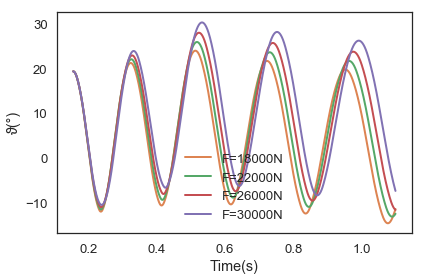

In [22]:
plot(results_lj.theta,label='F=18000N',color='C1')
plot(results_lj1.theta,label='F=22000N',color='C2')
plot(results_lj2.theta,label='F=26000N',color='C3')
plot(results_lj3.theta,label='F=30000N',color='C4')

decorate(xlabel='Time(s)',ylabel='ϑ(°)')

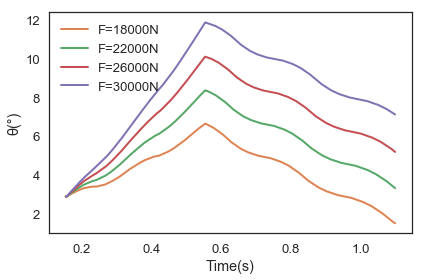

In [23]:
plot(results_lj.theta_gui,label='F=18000N',color='C1')
plot(results_lj1.theta_gui,label='F=22000N',color='C2')
plot(results_lj2.theta_gui,label='F=26000N',color='C3')
plot(results_lj3.theta_gui,label='F=30000N',color='C4')

decorate(xlabel='Time(s)',ylabel='θ(°)')

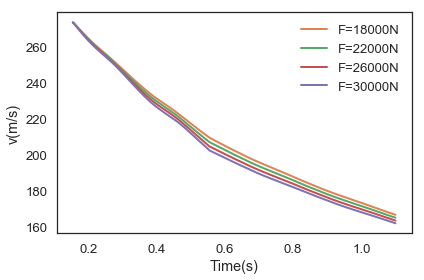

In [24]:
plot(results_lj.v,label='F=18000N',color='C1')
plot(results_lj1.v,label='F=22000N',color='C2')
plot(results_lj2.v,label='F=26000N',color='C3')
plot(results_lj3.v,label='F=30000N',color='C4')

decorate(xlabel='Time(s)',ylabel='v(m/s)')

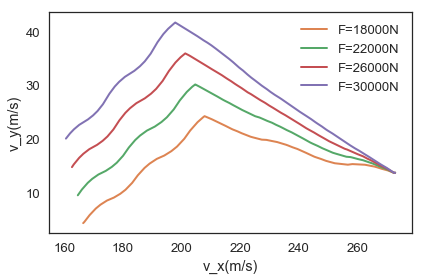

In [25]:
plot(results_lj.v_x,results_lj.v_y,label='F=18000N',color='C1')
plot(results_lj1.v_x,results_lj1.v_y,label='F=22000N',color='C2')
plot(results_lj2.v_x,results_lj2.v_y,label='F=26000N',color='C3')
plot(results_lj3.v_x,results_lj3.v_y,label='F=30000N',color='C4')

decorate(xlabel='v_x(m/s)',ylabel='v_y(m/s)')